In [1]:
import pandas as pd

✅ Dataset created successfully
   temperature  vibration   current     voltage  fault
0    74.967142   0.639936  8.649643  210.460962      0
1    68.617357   0.592463  9.710963  215.698075      0
2    76.476885   0.505963  8.415160  217.931972      0
3    85.230299   0.435306  9.384077  229.438438      0
4    67.658466   0.569822  6.212771  222.782766      0

Missing values in dataset:
temperature    0
vibration      0
current        0
voltage        0
fault          0
dtype: int64


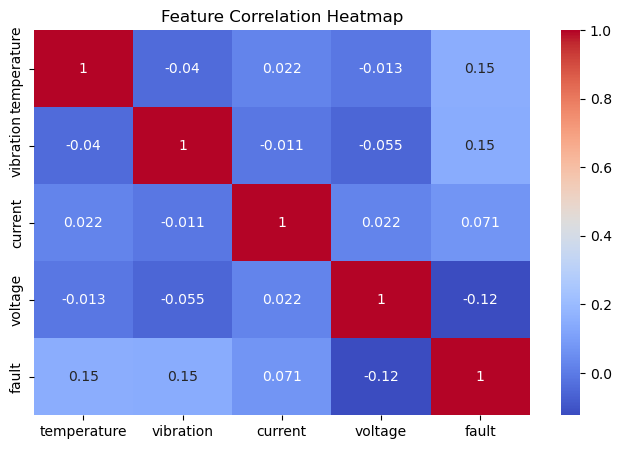

/var/folders/p3/1hk_xn8j31x4yynngbwwj1l80000gn/T/ipykernel_3312/538991368.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fault', data=data, palette='Set2')


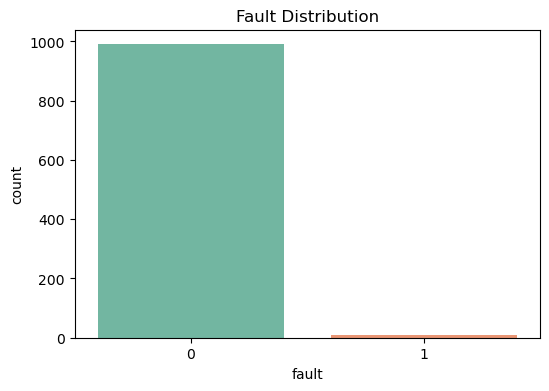


🔹 Logistic Regression Results:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       199
           1       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200



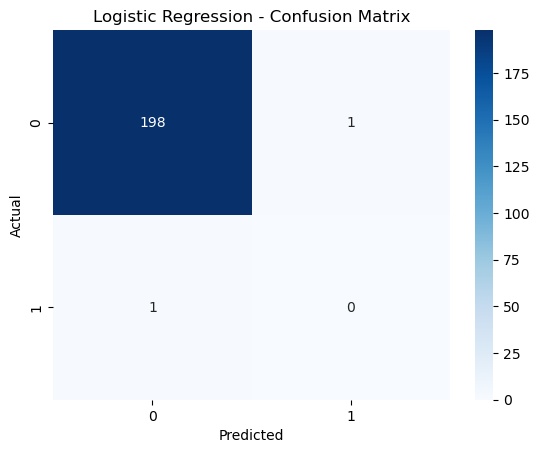


🔹 Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00         1

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



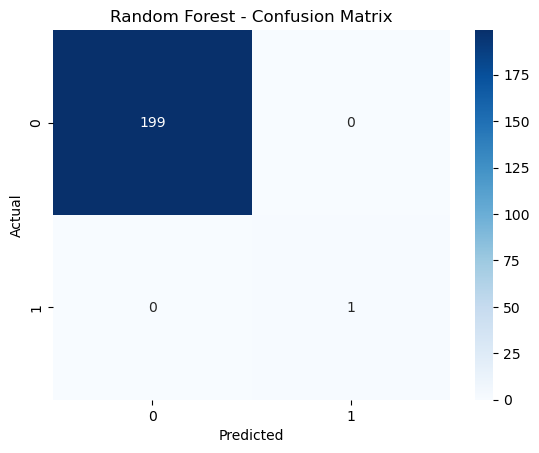

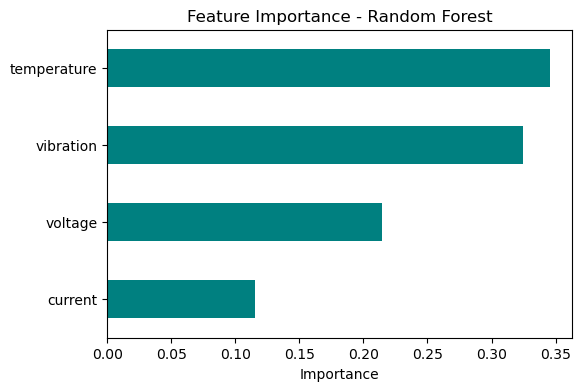

💾 Model saved as motor_fault_model.pkl

Project Summary:
- Built and trained two models: Logistic Regression and Random Forest
- Evaluated accuracy and classification metrics
- Random Forest provided better performance and interpretability
- Can be extended to real sensor datasets for predictive maintenance



In [3]:
# Electric Motor Fault Prediction Model
# Author: Umuhoza Bayingana Denyse
# Year: 2025
# Description:
# Predicts electric motor faults based on simulated sensor data using Machine Learning techniques.

# --------------------------
# 1️⃣ Import Libraries
# --------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 2️⃣ Generate Synthetic Dataset
# --------------------------
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'temperature': np.random.normal(70, 10, n_samples),
    'vibration': np.random.normal(0.5, 0.1, n_samples),
    'current': np.random.normal(10, 2, n_samples),
    'voltage': np.random.normal(220, 5, n_samples)
})

# Simulate fault: higher vibration + temperature + lower voltage = fault
data['fault'] = np.where(
    (data['temperature'] > 80) & (data['vibration'] > 0.6) & (data['voltage'] < 218),
    1, 0
)

print("✅ Dataset created successfully")
print(data.head())

# --------------------------
# 3️⃣ Data Cleaning
# --------------------------
print("\nMissing values in dataset:")
print(data.isnull().sum())

# --------------------------
# 4️⃣ Exploratory Data Analysis (EDA)
# --------------------------
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='fault', data=data, palette='Set2')
plt.title("Fault Distribution")
plt.show()

# --------------------------
# 5️⃣ Feature Engineering
# --------------------------
X = data[['temperature', 'vibration', 'current', 'voltage']]
y = data['fault']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# 6️⃣ Model Training
# --------------------------
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --------------------------
# 7️⃣ Model Evaluation
# --------------------------
models = {'Logistic Regression': log_reg, 'Random Forest': rf_model}

for name, model in models.items():
    if name == 'Logistic Regression':
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --------------------------
# 8️⃣ Feature Importance (Random Forest)
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(6,4), color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()

# --------------------------
# 9️⃣ Save Model (Optional)
# --------------------------
import joblib
joblib.dump(rf_model, "motor_fault_model.pkl")
print("💾 Model saved as motor_fault_model.pkl")

# --------------------------
# ✅ Summary
# --------------------------
print("""
Project Summary:
- Built and trained two models: Logistic Regression and Random Forest
- Evaluated accuracy and classification metrics
- Random Forest provided better performance and interpretability
- Can be extended to real sensor datasets for predictive maintenance
""")
